# Ejercicio Machine Learning: 

## Ejercicio para determinar si conviene comprar o alquilar una casa

### Nombre: Paola

En este ejercicio usamos el algoritmo Gaussian Naive Bayes para determinar si conviene adquirir un crédito hipotecario para comprar una casa o lo más conveninete sea alquilar una casa.

### Leemos los datos

In [7]:
dataframe = pd.read_csv('comprar_alquilar.csv')

In [8]:
dataframe.head(10)

,ingresos,gastos_fijos,pago_auto,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


In [12]:
print(dataframe.groupby('comprar').size())

comprar
0    135
1     67
dtype: int64


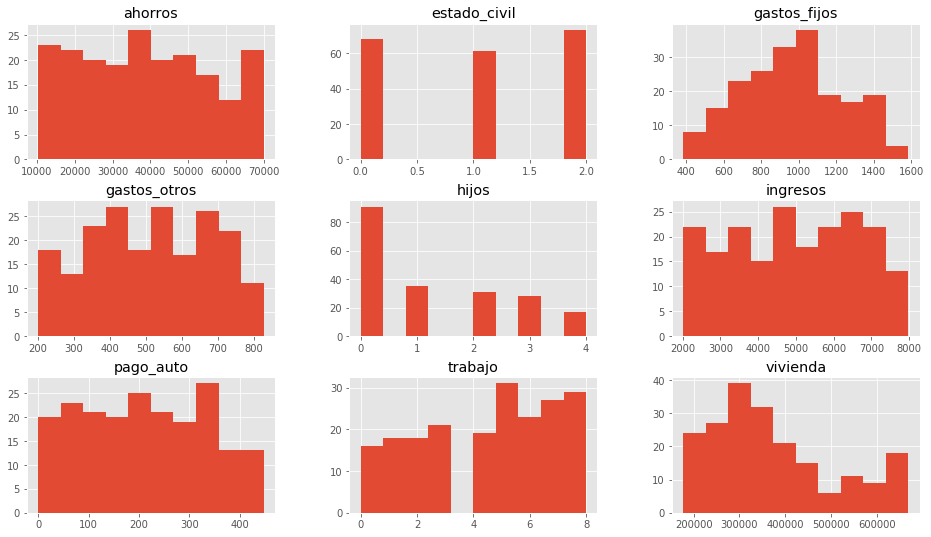

In [13]:
dataframe.drop(['comprar'], axis = 1).hist()
plt.show()

### Preprocesamos los datos

Vamos a anexar 2 atributos nuevo. El primero "gastos" el cual representa los gastos mensuales, el segundo atributo "financear" el cual 

In [14]:
dataframe['financiar'] = dataframe['vivienda'] = dataframe['ahorros']
dataframe.drop(['gastos_fijos', 'gastos_otros', 'pago_auto'], axis = 1).head(10)

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,financiar
0,6000,50000,50000,0,2,2,1,50000
1,6745,43240,43240,1,3,6,0,43240
2,6455,57463,57463,2,1,8,1,57463
3,7098,54506,54506,0,0,3,0,54506
4,6167,41512,41512,0,0,3,1,41512
5,5692,50875,50875,1,4,5,1,50875
6,6830,46761,46761,1,1,5,1,46761
7,6470,57439,57439,0,0,1,0,57439
8,6251,50503,50503,0,0,3,1,50503
9,6987,40611,40611,2,1,7,1,40611


### Estadistica descriptiva de los datos

In [17]:
reduced = dataframe.drop(['gastos_fijos', 'gastos_otros', 'pago_auto'], axis = 1)
reduced.describe()

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,financiar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,38749.668317,38749.668317,1.024752,1.232673,4.490099,0.331683,38749.668317
std,1682.862556,17365.231870,17365.231870,0.837184,1.367833,2.535794,0.471988,17365.231870
min,2008.000000,10319.000000,10319.000000,0.000000,0.000000,0.000000,0.000000,10319.000000
25%,3513.750000,24964.250000,24964.250000,0.000000,0.000000,2.000000,0.000000,24964.250000
50%,4947.500000,38523.000000,38523.000000,1.000000,1.000000,5.000000,0.000000,38523.000000
75%,6374.500000,52150.750000,52150.750000,2.000000,2.000000,7.000000,1.000000,52150.750000
max,7984.000000,69934.000000,69934.000000,2.000000,4.000000,8.000000,1.000000,69934.000000


### Seleccion de los atributos caracteristica de entrada

### Visualizar correlacion entre las columnas

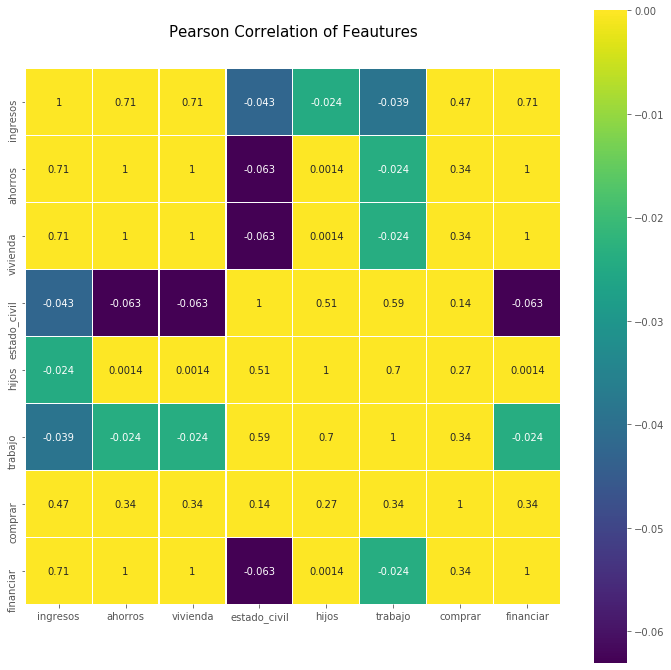

In [21]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Feautures', y=1.05, size=15)
sb.heatmap(reduced.astype(float).corr(), linewidths=0.1, vmax=0, square=True, cmap=colormap, linecolor='white', annot=True)